In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
def logsigmoid(x):
    return -np.log(1+np.exp(-x))

In [219]:
pi = 3.14159265358979323846
gamma = 5
# embedding_range = (gamma + 2)/d
embedding_range = pi

In [222]:
def RotatE(head, relation, tail):        
        re_head, im_head = head[:,0], head[:,1] # np.chunk(head, 2, dim=2)
        re_tail, im_tail = tail[:,0], tail[:,1] # np.chunk(tail, 2, dim=2)

        #Make phases of relations uniformly distributed in [-pi, pi]
        phase_relation = relation # /(embedding_range/pi)
        # Type A Check: (-pi, pi)
        if np.any(np.abs(phase_relation) >= pi):
            raise OverflowError()
            
#         # Type B Check: (0, pi)
#         if np.any((phase_relation >= pi) + (phase_relation <= 0)):
#             raise OverflowError()

        re_relation = np.cos(phase_relation)
        im_relation = np.sin(phase_relation)

#         if mode == 'head-batch':
#         re_score = re_relation * re_tail + im_relation * im_tail
#         im_score = re_relation * im_tail - im_relation * re_tail
#         re_score = re_score - re_head
#         im_score = im_score - im_head
#         else:
        re_score = re_head * re_relation - im_head * im_relation
        im_score = re_head * im_relation + im_head * re_relation
        re_score = re_score - re_tail
        im_score = im_score - im_tail
        
        #score = np.sum(np.sqrt(re_score**2 + im_score**2))
        score = np.sqrt(np.sum(re_score**2 + im_score**2))
#         score = np.linalg.norm(score, axis = 0)

        score = (gamma - score)
        return score

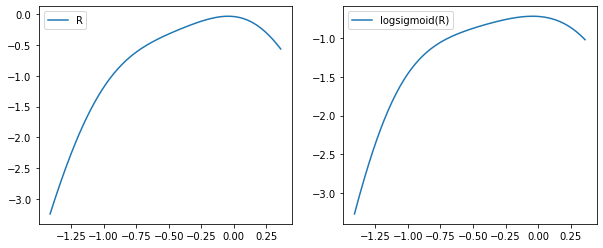

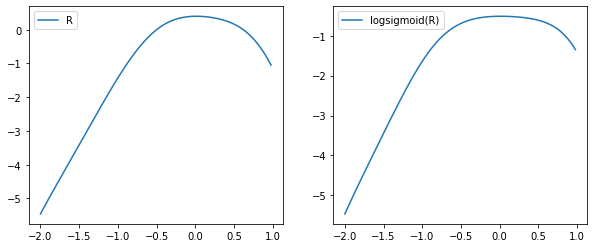

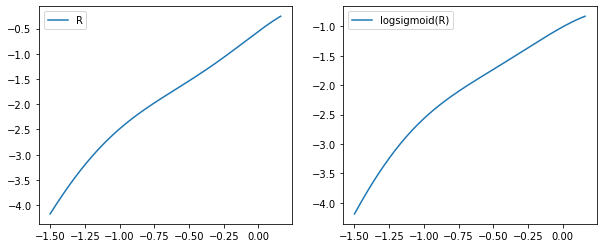

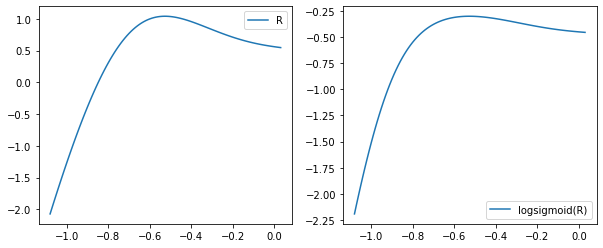

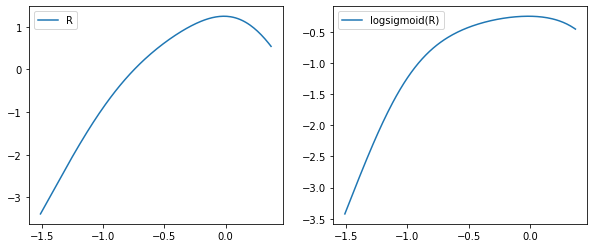

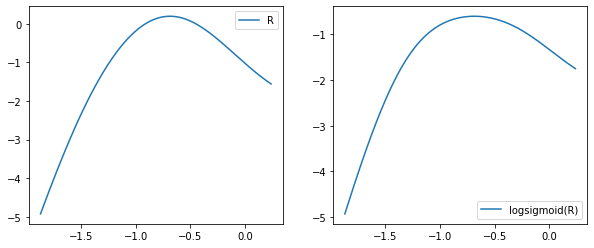

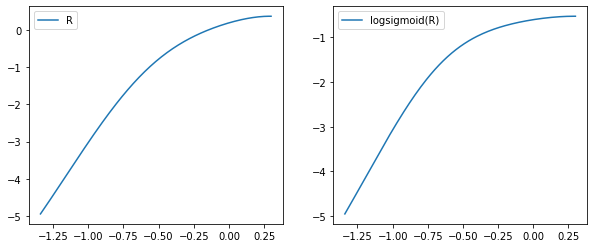

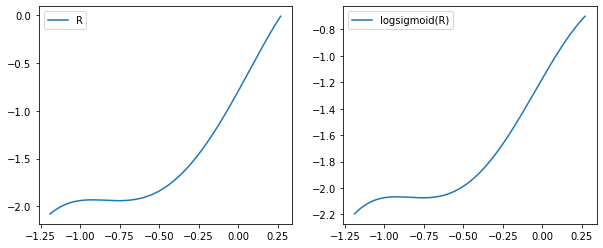

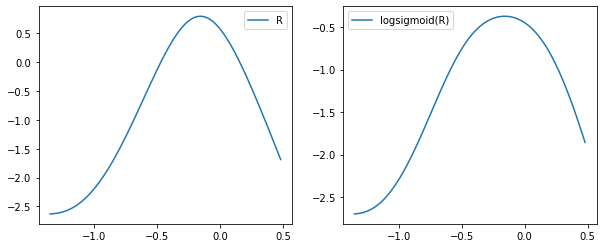

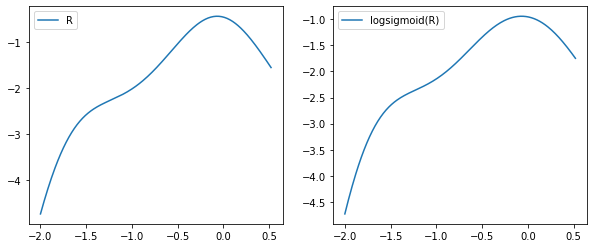

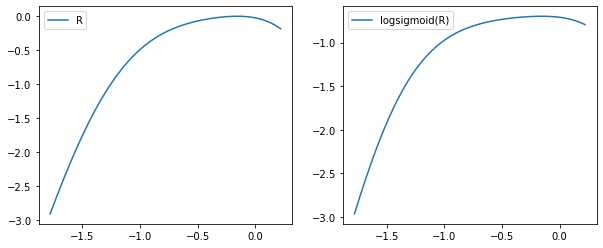

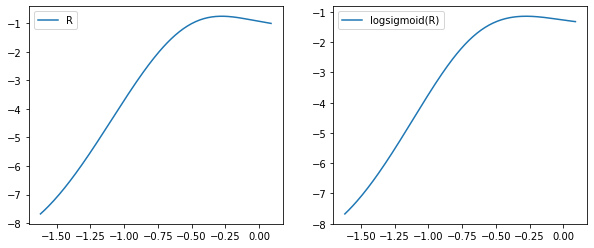

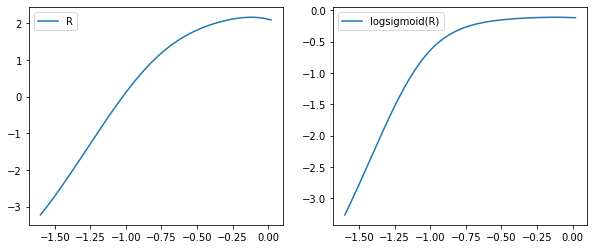

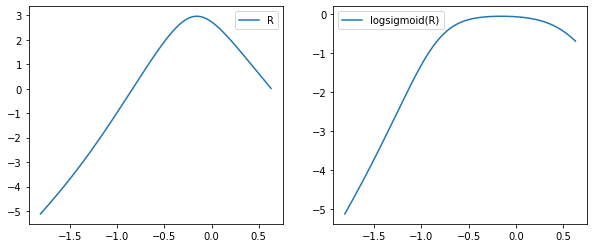

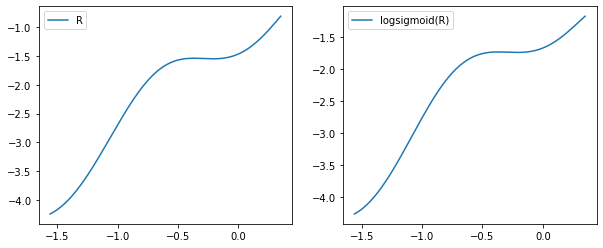

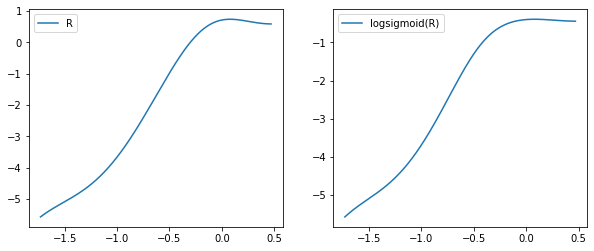

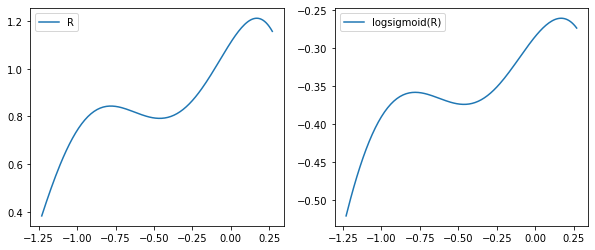

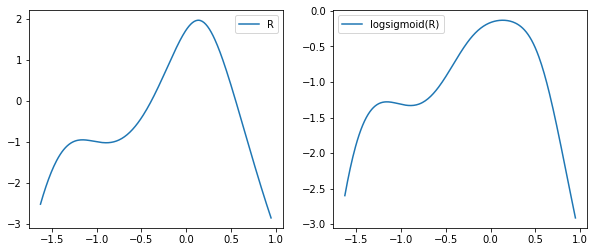

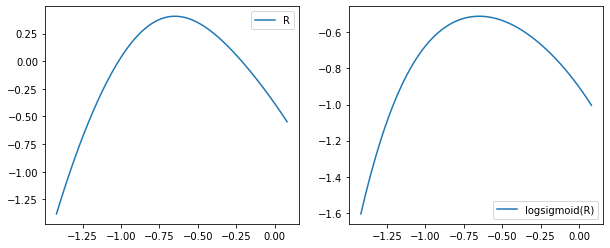

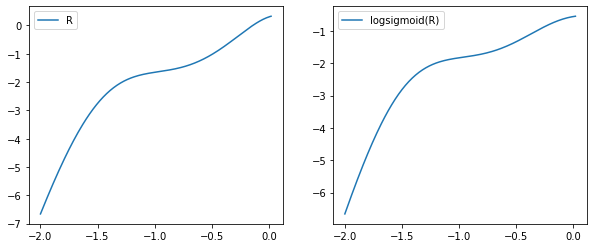

In [223]:
for _ in range(20):
    d = 6
    h1 = np.random.randn(d,2)
    t1 = np.random.randn(d,2)
    # r1 = (np.random.rand(d)-0.5)*2*embedding_range
    r1 = np.random.rand(d)*embedding_range

    h2 = np.random.randn(d,2)
    t2 = np.random.randn(d,2)
    r2 = np.random.rand(d)*embedding_range

    x = []
    y = []
    ly  = []
    for t in np.arange(-2,2,0.01):
        try:
            u = RotatE(h1+t*h2,r1+t*r2,t1+t*t2)
            v = logsigmoid(u)
        except OverflowError as e:
            continue
        x.append(t)
        y.append(u)
        ly.append(v)

    fig, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0].plot(x, y)
    ax[1].plot(x, ly)
    ax[0].legend(['R'])
    ax[1].legend(['logsigmoid(R)'])